2021-06-10<br><br>

NLP 강의 2

In [52]:
import re, collections
# re : regular expression. 정규식을 사용하기 위한 라이브러리
# collections : count를 사용하기위해 불러온 라이브러리

In [53]:
num_merges = 10
# merges를 실행할 횟수 지정

In [92]:
dictionary = {"l o w </w>" : 5,
              "l o w e r </w>" : 2,
              "n e w e s t </w>" : 6,
              "w i d e s t </w>" : 3
              }
# sub word로 나눌 단어가 들어있는 딕셔너리
dictionary

{'l o w </w>': 5,
 'l o w e r </w>': 2,
 'n e w e s t </w>': 6,
 'w i d e s t </w>': 3}

In [93]:
# n-gram?
# n개의 단어로 묶어준것

# e.g.
# 우리들은 밥을 먹었고, 나는 공부중이다.

# 공백을 기준으로 분할한 단어의 경우

# # unigram : 
# 우리들은 
# 밥을 
# 먹었고, 
# 나는 
# 공부중이다.

# # bigram:
# 우리들은 밥을 
# 먹었고, 나는
# 공부중이다. \

# # trigram
# 우리들은 밥을 먹었고,
# 나는 공부중이다. \

# # 4개 짜리도 있고.. 함

In [94]:
def get_stats(dictionary):
  # 유니그램의 pair 들의 빈도수를 카운트
  pairs = collections.defaultdict(int)
  # collections의 dictionary를 만드는 함수
  # key값이 없을 경우 미리 지정해 놓은 초기(default)값을 반환
  for word, freq in dictionary.items():
    # .items() : dictionary의 키값과 value값을 반환
    symbols = word.split()
    # dictionary안에 들어있는 단어(키값)를 공백으로 분리
    # type(symbols) : list
    for i in range(len(symbols)-1):
      pairs[symbols[i], symbols[i+1]] += freq
      # pairs에 symbols[i], symbols[i+1]의 값에 해당하는 키값을 주고
      # 만들어진 키값에 freq(dictionary에서 가져온 value값)를 할당
  print("현재 pair들의 빈도수  :", dict(pairs))
  return pairs

In [95]:
def merge_dictionary(pair, v_in):
  v_out = {}
  # 빈 딕셔너리 생성
  bigram = re.escape(" ".join(pair))
  # re.escape() : 문자열을 입력받으면 특수문자들을 이스케이프 처리
  # pair과 공백을 결합하고, 나온 결과값에 특수문자 있으면, 
  # 이스케이프(특수문자 효과 제거. \n(줄바꿈) 등) 처리
  p = re.compile(r"(?<!\S)" + bigram + r"(?!\S)")
  # 어떤문자
  for word in v_in:
    w_out = p.sub("".join(pair), word)
    v_out[w_out] = v_in[word]
  return v_out

In [96]:
bpe_codes = {}
bpe_codes_reverse = {}

In [97]:
for i in range(num_merges):
  print(">> Step {0}".format(i+1))
  pairs = get_stats(dictionary)
  best = max(pairs, key = pairs.get)
  dictionary = merge_dictionary(best, dictionary)

  bpe_codes[best] = i
  bpe_codes_reverse[best[0] + best[1]] = best

  print("new merge : {}".format(best))
  print("dictionary : {}".format(dictionary) ) 

>> Step 1
현재 pair들의 빈도수  : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge : ('e', 's')
dictionary : {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}
>> Step 2
현재 pair들의 빈도수  : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge : ('es', 't')
dictionary : {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}
>> Step 3
현재 pair들의 빈도수  : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge : ('est', '</w>')


In [98]:
# merge 했던 기록 출력

print(bpe_codes)

{('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9}


##### OOV에 대처

In [99]:
def get_pair(word):
  pairs = set()
  prev_char = word[0]
  for char in word[1:]:
    pairs.add((prev_char, char))
    prev_char = char
  return pairs

In [ ]:
def encode(orig):
  word = tuple(orig) + ("</w>", )
  print("__word split into character: __ <tt><{}</tt>".format(word))

  pairs = get_pair(word)

  if not pairs:
    return orig

  iteration = 0
  while True:
    iteration += 1
    print("__Iteration {} : __".format(iteration))

    print("bigram in the word: {}".format(pairs))
    bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float("inf")))
    print("candidate for merging : {}".format(bigram))

    if bigram not in bpe_codes:
      print("__candidate not in BPE merges, algorithm stops.__")
      break
    first, second = bigram
    new_word = []
    i = 0
    while i < len(word):
      try:
        j = word.index(first, i)
        new_word.extend(word[i:j])
        i = j
      except:
        new_word.extend(word[i:])
        break

      if word[i] == first and i <len(word)-1 and word[i+1] == second:
        new_word.append(first+second)
        i += 2
      else:
        new_word.append(word[i])
        i += 2

      new_word = tuple(new_word)
      word = new_word
      print("word after merging : {}".format(word))
      if len(word) == 1:
        break
      else:
        pairs = get_pair(word)

      # 특별 토큰인 </w> 는 출력 X
      if word[-1] == "</w>":
        word = word[:-1]
      elif word[-1].endwith("</w>"):
        word = word[:-1] + (word[-1].replace("</w", ""),)

      return word

In [ ]:
encode("loki")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
candidate for merging : ('l', 'o')
__Iteration 19751 : __
bigram in the word: {('o', 'k'), ('l', 'o'), ('k', 'i'), ('i', '</w>')}
candidate for merging : ('l', 'o')
__Iteration 19752 : __
bigram in the word: {('o', 'k'), ('l', 'o'), ('k', 'i'), ('i', '</w>')}
candidate for merging : ('l', 'o')
__Iteration 19753 : __
bigram in the word: {('o', 'k'), ('l', 'o'), ('k', 'i'), ('i', '</w>')}
candidate for merging : ('l', 'o')
__Iteration 19754 : __
bigram in the word: {('o', 'k'), ('l', 'o'), ('k', 'i'), ('i', '</w>')}
candidate for merging : ('l', 'o')
__Iteration 19755 : __
bigram in the word: {('o', 'k'), ('l', 'o'), ('k', 'i'), ('i', '</w>')}
candidate for merging : ('l', 'o')
__Iteration 19756 : __
bigram in the word: {('o', 'k'), ('l', 'o'), ('k', 'i'), ('i', '</w>')}
candidate for merging : ('l', 'o')
__Iteration 19757 : __
bigram in the word: {('o', 'k'), ('l', 'o'), ('k', 'i'), ('i', '</w>')}
candidate for merging : ('l', 'o')
__Iteration 19758 :

KeyboardInterrupt: ignored

In [ ]:
encode("hiking")

__word split into character: __ <tt><('h', 'i', 'k', 'i', 'n', 'g', '</w>')</tt>
__Iteration 1 : __
bigram in the word: {('i', 'n'), ('g', '</w>'), ('i', 'k'), ('n', 'g'), ('k', 'i'), ('h', 'i')}
candidate for merging : ('i', 'n')
__candidate not in BPE merges, algorithm stops.__


## IMDB 리뷰 토큰화

In [ ]:
import tensorflow_datasets as tfds
import urllib.request
import pandas as pd

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7f5c980c29d0>)

In [ ]:
train_df = pd.read_csv("IMDb_Reviews.csv")

In [ ]:
train_df["review"]

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

In [ ]:
train_df["sentiment"]

0        1
1        0
2        0
3        1
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: sentiment, Length: 50000, dtype: int64

In [ ]:
# train_df["review"] 토큰화

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(train_df["review"], target_vocab_size=2**13)

# vocab 사이즈를 2^13으로 준 것
# 긴 문장에 맞춰 임의로 주는 하이퍼 파라미터임
# 너무 길어도 오래걸리므로 적절한 사이즈를 지정해주는것이 중요

In [ ]:
# 결과 확인

print(tokenizer.subwords[:100])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 't_', 'as_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', 'are_', ' (', 'have_', 'his_', 'film_', 'not_', 'be_', 'you_', 'ing_', ' "', 'ed_', 'it', 'd_', 'an_', 'at_', 'by_', 'he_', 'one_', 'who_', 'from_', 'y_', 'or_', 'e_', 'like_', 'all_', '" ', 'they_', 'so_', 'just_', 'has_', ') ', 'about_', 'her_', 'out_', 'This_', 'some_', 'movie', 'ly_', 'film', 'very_', 'more_', 'It_', 'what_', 'would_', 'when_', 'if_', 'good_', 'up_', 'which_', 'their_', 'only_', 'even_', 'my_', 'really_', 'had_', 'can_', 'no_', 'were_', 'see_', '? ', 'she_', 'than_', '! ', 'there_', 'been_', 'get_', 'into_', 'will_', ' - ', 'much_', 'n_', 'because_', 'ing']


In [ ]:
# 21번째 샘플 출력

print(train_df["review"][20])

Pretty bad PRC cheapie which I rarely bother to watch over again, and it's no wonder -- it's slow and creaky and dull as a butter knife. Mad doctor George Zucco is at it again, turning a dimwitted farmhand in overalls (Glenn Strange) into a wolf-man. Unfortunately, the makeup is virtually non-existent, consisting only of a beard and dimestore fangs for the most part. If it were not for Zucco and Strange's presence, along with the cute Anne Nagel, this would be completely unwatchable. Strange, who would go on to play Frankenstein's monster for Unuiversal in two years, does a Lenny impression from "Of Mice and Men", it seems.<br /><br />*1/2 (of Four)


In [ ]:
# train_df["riview"][20]에 있는 것을 tokenizer.encode를 이요하여 숫자로 인코딩

print("토큰화된 샘플 질문 : {}".format(tokenizer.encode(train_df["review"][20])))

토큰화된 샘플 질문 : [1590, 4162, 132, 7107, 1892, 2983, 578, 76, 12, 4632, 3422, 7, 160, 175, 372, 2, 5, 39, 8051, 8, 84, 2652, 497, 39, 8051, 8, 1374, 5, 3461, 2012, 48, 5, 2263, 21, 4, 2992, 127, 4729, 711, 3, 1391, 8044, 3557, 1277, 8102, 2154, 5681, 9, 42, 15, 372, 2, 3773, 4, 3502, 2308, 467, 4890, 1503, 11, 3347, 1419, 8127, 29, 5539, 98, 6099, 58, 94, 4, 1388, 4230, 8057, 213, 3, 1966, 2, 1, 6700, 8044, 9, 7069, 716, 8057, 6600, 2, 4102, 36, 78, 6, 4, 1865, 40, 5, 3502, 1043, 1645, 8044, 1000, 1813, 23, 1, 105, 1128, 3, 156, 15, 85, 33, 23, 8102, 2154, 5681, 5, 6099, 8051, 8, 7271, 1055, 2, 534, 22, 1, 3046, 5214, 810, 634, 8120, 2, 14, 71, 34, 436, 3311, 5447, 783, 3, 6099, 2, 46, 71, 193, 25, 7, 428, 2274, 2260, 6487, 8051, 8, 2149, 23, 1138, 4117, 6023, 163, 11, 148, 735, 2, 164, 4, 5277, 921, 3395, 1262, 37, 639, 1349, 349, 5, 2460, 328, 15, 5349, 8127, 24, 10, 16, 10, 17, 8054, 8061, 8059, 8062, 29, 6, 6607, 8126, 8053]


In [ ]:
sample_string = "it's mind-bolowing to me that this film was even made."

# 샘플 문장 인코딩
tokenized_string = tokenizer.encode(sample_string)
print(f"정수 인코딩 후의 문장 : {tokenized_string}")

# 인코딩한 샘플문장을 디코딩하여 원래 형태로 복원 
original_string = tokenizer.decode(tokenized_string)
print(f"기존문장 : {original_string}")

정수 인코딩 후의 문장 : [39, 8051, 8, 910, 8057, 3132, 1960, 36, 7, 103, 13, 14, 32, 18, 79, 681, 8058]
기존문장 : it's mind-bolowing to me that this film was even made.


In [ ]:
# 토큰화 하여 만들어진 단어집합 크기
# 각각 맵핑된 결과

print(f"단어집합의 크기(Vocab size) : {tokenizer.vocab_size}")

단어집합의 크기(Vocab size) : 8268


In [ ]:
# 숫자와 문자 맵핑 내용 확인
# 숫자로 디코딩된 토큰들의 맵핑. 토큰의 인덱스 확인

for ts in tokenized_string:
  print(f"{ts} ---> {tokenizer.decode([ts])}")

39 ---> it
8051 ---> '
8 ---> s 
910 ---> mind
8057 ---> -
3132 ---> bol
1960 ---> ow
36 ---> ing 
7 ---> to 
103 ---> me 
13 ---> that 
14 ---> this 
32 ---> film 
18 ---> was 
79 ---> even 
681 ---> made
8058 ---> .


In [ ]:
# 학습되어있는 것과 다른 단어가 들어올 시 어떻게 반응?

# sample_string = "it's mind-bolowing to me that this film was even made."이 원본. 
# even에 xyz를 붙여 어떠한 결과가 나오는지 확인
sample_string = "it's mind-bolowing to me that this film was evenxyz made."


# 샘플 문장 인코딩
tokenized_string = tokenizer.encode(sample_string)
print(f"정수 인코딩 후의 문장 : {tokenized_string}")

# 인코딩한 샘플문장을 디코딩하여 원래 형태로 복원 
original_string = tokenizer.decode(tokenized_string)
print(f"기존문장 : {original_string}")
print()


# 숫자와 문자 맵핑 내용 확인
for ts in tokenized_string:
  print(f"{ts} ---> {tokenizer.decode([ts])}")


# xyz는 들어온 적 없는 단어이므로 분리되어 각각의 토큰으로 처리됨

정수 인코딩 후의 문장 : [39, 8051, 8, 910, 8057, 3132, 1960, 36, 7, 103, 13, 14, 32, 18, 7974, 8132, 8133, 997, 681, 8058]
기존문장 : it's mind-bolowing to me that this film was evenxyz made.

39 ---> it
8051 ---> '
8 ---> s 
910 ---> mind
8057 ---> -
3132 ---> bol
1960 ---> ow
36 ---> ing 
7 ---> to 
103 ---> me 
13 ---> that 
14 ---> this 
32 ---> film 
18 ---> was 
7974 ---> even
8132 ---> x
8133 ---> y
997 ---> z 
681 ---> made
8058 ---> .


## 파이썬 TF-IDF 구현

In [ ]:
# 필요 라이브러리 불러오기

import pandas as pd
from math import log

In [ ]:
docs = [
        "먹고 싶은 사과",
        "먹고 싶은 바나나",
        "길고 노란 바나나 바나나",
        "저는 과일이 좋아요"
]

In [ ]:
# 공백 기준 split

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [ ]:
# 문서의 총수
n = len(docs)
print(n)

4


In [ ]:
# TF 구현

def tf(t, d):
  return d.count(t)
  # doucument 문서의 단어수

In [ ]:
def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(n/(df+1)) 

In [ ]:
def tfidf(t, d):
  return tf(t, d) * idf(t)

In [ ]:
result = []
for i in range(n):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t, d))

tfidf_ = pd.DataFrame(result, columns = vocab)
display(tfidf_)

print(docs)

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']


## sikit-learn을 이용한 TF-IDF 구현

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from copy import copy

In [ ]:
corpus = copy(docs)

In [ ]:
tfidfv = TfidfVectorizer().fit(corpus)

print(tfidfv.transform(corpus).toarray())
print()

print(tfidfv.vocabulary_)

# 패키지마다 TF-IDF 구현하는 방법이 조금씩 다름
# 따라서 앞에서 구현한 값과는 다를 수 있음

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]

{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


## 로이터 데이터로 TF-IDF 학습

In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:

(x_train, y_train), (x_test, y_test) =reuters.load_data(num_words=10000, test_split=0.2)
# 데이터에서 빈도수 기준 상위 몇번째 단어까지 사용할건지?
# 테스트 데이터 20퍼
# 등장빈도 상위 10000번. 
# 반드시 괄호쳐야됨

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print(f"훈련 샘플의 수 : {len(x_train)}")
print(f"테스트 샘플의 수 : {len(x_test)}")

훈련 샘플의 수 : 8982
테스트 샘플의 수 : 2246


In [ ]:
print(x_train[0])
print(x_test[0])

# 인코딩되어있는 데이터를 불러옴

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [ ]:
print(f"훈련 샘플의 수 : {len(y_train)}")
print(f"테스트 샘플의 수 : {len(y_test)}")
print()

print(y_train[0])
print(y_test[0])

훈련 샘플의 수 : 8982
테스트 샘플의 수 : 2246

3
3


In [ ]:
num_classes = max(y_train) + 1
print(f"클래스의 수 : {num_classes}")

클래스의 수 : 46


In [ ]:
print(f"훈련용 뉴스의 최대 길이 : {max(len(l) for l in x_train)}")
print(f"훈련용 뉴스의 평균 길이 : {sum(map(len, x_train)) / len(x_train)}")

훈련용 뉴스의 최대 길이 : 2376
훈련용 뉴스의 평균 길이 : 145.5398574927633


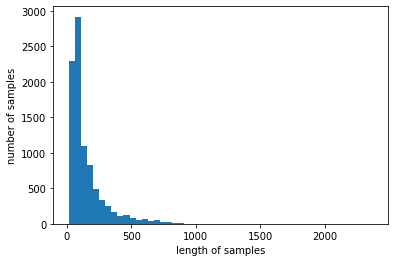

In [ ]:
# 샘플의 수 시각화

plt.hist([len(s) for s in x_train], bins = 50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


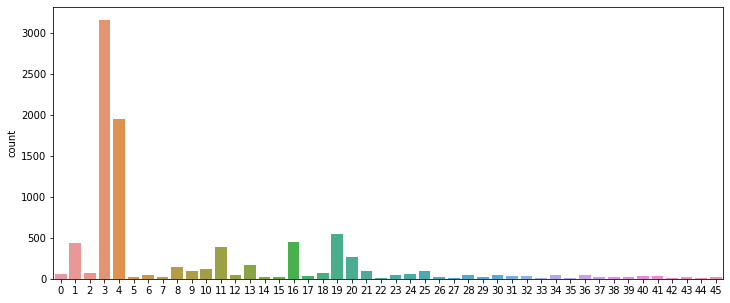

In [ ]:
# 클래스는 모델의 성능에 영향을 미침
# 클래스를 확인해볼것임

fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

# 3, 4 번 데이터가 대다수
# 대부분의 뉴스가 0 언저리에 있음

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수 : ")
print(np.asarray((unique_elements, counts_elements)))

# 3, 4 번 클래스의 빈도수가 3159, 1949개로 그래프에서 본 것 처럼 높음

각 클래스 빈도수 : 
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
# 어떤 단어와 맵핑되어있는지 확인 할 수 있도록 함

557056/550378 [==============================] - 0s 0us/step


In [ ]:
word_index["the"]


1

In [ ]:
word_index["it"]

13

In [ ]:
# index를 word로 변환하는 작업

# 순서 + 3을 더한게 원래 데이터의 인덱스 값임.
# 로이터 데이터에서 인덱스를 만들때 정한 규칙임
# 따라서 위 인덱스 값에서 3을 더해서 계산해야함

index_to_word = {index + 3: word for word, index in word_index.items()}

In [ ]:
print(index_to_word[4])
print(index_to_word[16])

# 위의 인덱스와는 다르지만 값은 같음

the
it


In [ ]:
# 0~2 인덱스에 맵핑 되어있는것
# 0 : <pad>
# 1 : <sos>
# 2 : <unk>
# 자연어 처리를 위해 해당 인덱스에는 이러한 것들이 들어있음

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

In [ ]:
# 디코딩 결과
print(" ".join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
# tf-idf 적용
# train 

decoded = []

for i in range(len(x_train)):
  t = " ".join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = copy(decoded)

In [ ]:
# tf-idf
# test

decoded = []

for i in range(len(x_test)):
  t = " ".join([index_to_word[index] for index in x_test[i]])
  decoded.append(t)

x_test = copy(decoded)

In [ ]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [ ]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

print(x_train_dtm)

(8982, 9670)
  (0, 8272)	1
  (0, 9181)	2
  (0, 7834)	3
  (0, 1677)	1
  (0, 7633)	1
  (0, 6365)	3
  (0, 5223)	1
  (0, 3143)	1
  (0, 1233)	1
  (0, 8303)	1
  (0, 2565)	1
  (0, 5213)	2
  (0, 3945)	1
  (0, 3608)	1
  (0, 6682)	3
  (0, 8055)	3
  (0, 4945)	3
  (0, 249)	1
  (0, 172)	1
  (0, 8932)	6
  (0, 383)	1
  (0, 3475)	6
  (0, 9218)	1
  (0, 4325)	3
  (0, 828)	1
  :	:
  (8981, 4219)	1
  (8981, 1863)	1
  (8981, 1590)	1
  (8981, 1261)	1
  (8981, 9246)	1
  (8981, 5025)	1
  (8981, 1837)	1
  (8981, 2191)	2
  (8981, 5451)	1
  (8981, 7489)	1
  (8981, 1573)	1
  (8981, 4941)	1
  (8981, 6117)	1
  (8981, 5183)	1
  (8981, 7852)	1
  (8981, 8153)	1
  (8981, 4024)	1
  (8981, 3909)	1
  (8981, 1315)	1
  (8981, 2358)	1
  (8981, 6081)	2
  (8981, 5418)	1
  (8981, 9133)	1
  (8981, 9594)	1
  (8981, 7294)	1


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

mod = MultinomialNB()

x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

print(classification_report(y_test, mod.predict(tfidfv_test)))

NotFittedError: ignored

In [ ]:
## 숙제
# 지금까지 했던 코드들 복습
# 주석달아오기
# 지금까지 코드 주석달기...

